<a href="https://colab.research.google.com/github/saeed-alzhr/Task_5/blob/main/Copy_of_Time_Series_Forecasting_Practice_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Practice Exercise

In this practice exercise, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in the `Datasets` file with the name `Aquifer_Petrignano` the target is to predict `Depth_to_Groundwater_P24` column.

## Dataset: Aquifer Petrignano

### Dataset Overview:

- **Name**: Aquifer Petrignano
- **Description**: This dataset contains time series data related to groundwater levels, rainfall, temperature, and hydrometry in the Aquifer Petrignano region. The data is collected over multiple years, capturing various environmental measurements. It is particularly useful for modeling groundwater levels, climate analysis, and time series forecasting.
- **Time Period**: Starting from 14/03/2006
- **Frequency**: Daily observations

### Features:

1. **Date**: The date of the observation in `DD/MM/YYYY` format.
2. **Rainfall_Bastia_Umbra**: Daily rainfall measurement in the Bastia Umbra region (mm).
3. **Depth_to_Groundwater_P24**: Depth to groundwater at observation point P24 (meters).
4. **Depth_to_Groundwater_P25**: Depth to groundwater at observation point P25 (meters).
5. **Temperature_Bastia_Umbra**: Daily temperature in the Bastia Umbra region (°C).
6. **Temperature_Petrignano**: Daily temperature in the Petrignano region (°C).
7. **Volume_C10_Petrignano**: Water volume measured at station C10 in Petrignano (m³).
8. **Hydrometry_Fiume_Chiascio_Petrignano**: Hydrometry measurements of the Fiume Chiascio river in Petrignano (m).


## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [ ]:
import numpy as np

In [ ]:
#read the dataset
import pandas as pd
df=pd.read_csv("Aquifer_Petrignano.csv")

In [ ]:
#Display the first rows of the dataset
df.head().transpose()

,0,1,2,3,4
Date,28/07/2009,21/06/2015,10/10/2019,09/12/2011,20/09/2011
Rainfall_Bastia_Umbra,0.0,0.0,0.0,0.0,1.0
Depth_to_Groundwater_P24,-28.9,-20.79,-27.36,-27.78,-26.09
Depth_to_Groundwater_P25,-28.12,-20.45,-26.75,-26.98,-25.55
Temperature_Bastia_Umbra,27.4,20.8,20.3,9.2,15.7
Temperature_Petrignano,25.6,0.0,20.0,8.8,15.7
Volume_C10_Petrignano,-34833.888,-18681.408,-28288.224,-37215.072,-30856.896
Hydrometry_Fiume_Chiascio_Petrignano,1.9,0.0,2.3,2.0,2.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


In [ ]:
#check for null values in the Date column
df["Date"].isna().sum()

0

In [ ]:
#check for the duplected
df["Date"].duplicated().sum()

0

In [ ]:
#check the shape of the Date column
df.shape

(5223, 8)

In [ ]:
#the Date type is opject so it should be turened to Datetime type and it should be it the format dd/mm/YYYY and we only need the date not the time || if there is any invalid data point it will be replced with NaT
df["Date"]=pd.to_datetime(df["Date"],errors="coerce",format="%d/%m/%Y").dt.date


In [ ]:
#The dataset is not sorted so after will change the Date to the right format we should sort it by time so we can strat the timeSeries analysis by the first datapoint that is recoreded
df.sort_values(by="Date", inplace=True)

In [ ]:
# to keep track of the date insted of using the actull date column||Time-step features¶
df['Date_index'] = np.arange(len(df.index))

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use seasonal_decompose from the statsmodels library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

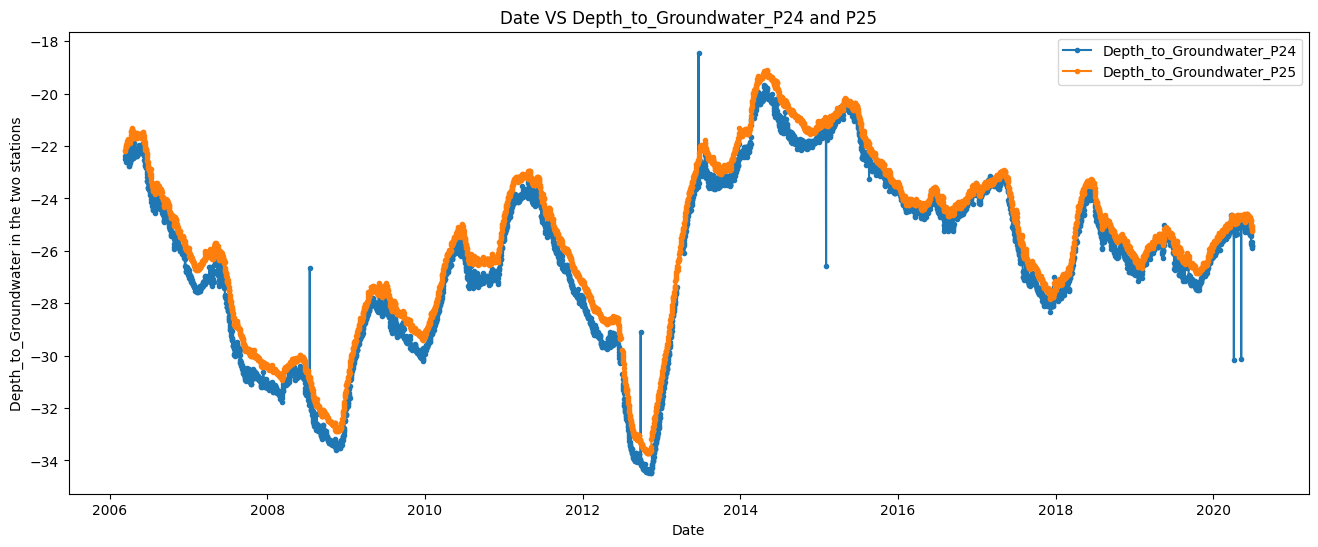

In [ ]:
# plot the tiem series data take in consedration that we have a missing value in the Depth_to_Groundwater_P24 || i will do it agan after i hanld the missing value
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
columns_to_plot=["Depth_to_Groundwater_P24","Depth_to_Groundwater_P25"]
for i in columns_to_plot :
  plt.plot(df["Date"],df[i],marker=".",label=i)

plt.title("Date VS Depth_to_Groundwater_P24 and P25")
plt.xlabel("Date")
plt.ylabel("Depth_to_Groundwater in the two stations")
plt.legend()


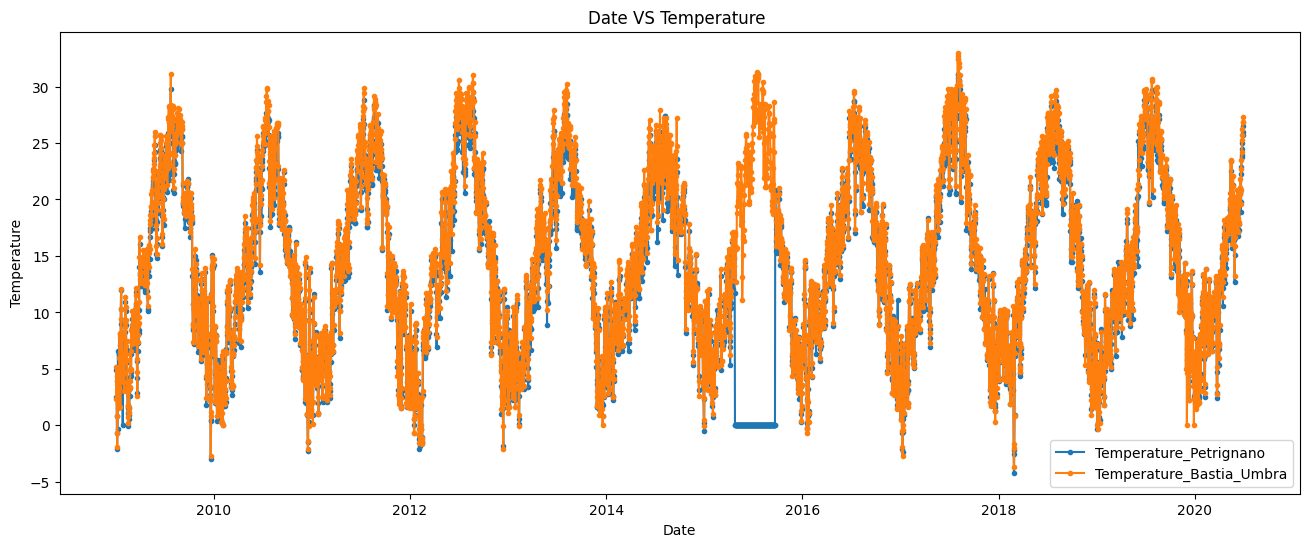

In [ ]:
columns_to_plot=["Temperature_Petrignano","Temperature_Bastia_Umbra"]
plt.figure(figsize=(16,6))
for i in columns_to_plot :
  plt.plot(df["Date"],df[i],marker=".",label=i)

plt.title("Date VS Temperature ")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()

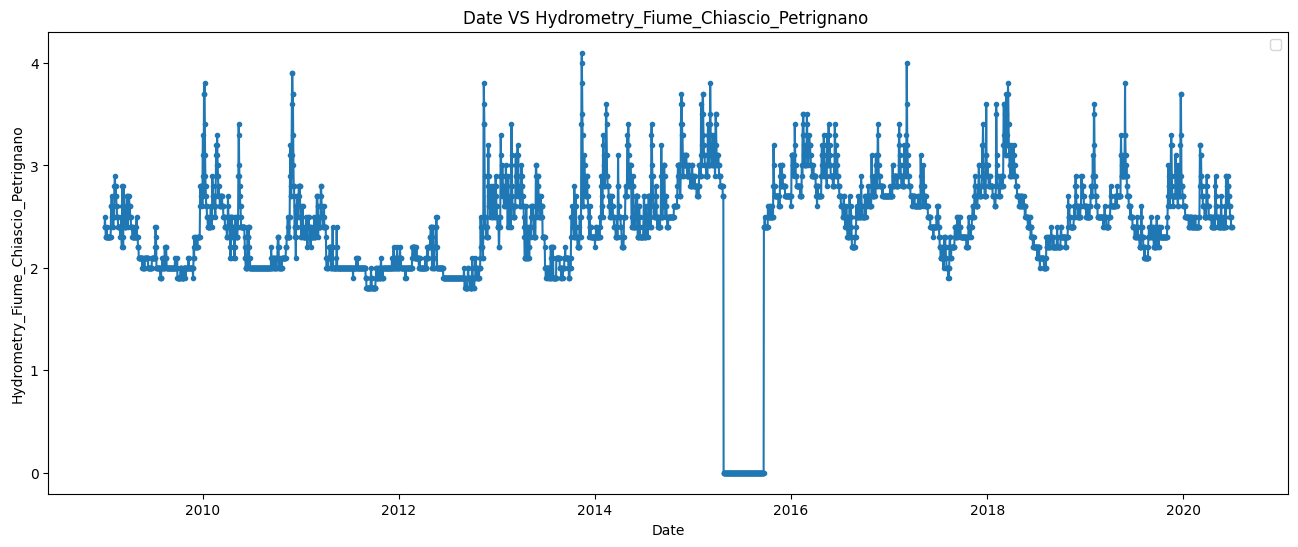

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(df["Date"],df["Hydrometry_Fiume_Chiascio_Petrignano"],marker=".")
plt.title("Date VS Hydrometry_Fiume_Chiascio_Petrignano ")
plt.xlabel("Date")
plt.ylabel("Hydrometry_Fiume_Chiascio_Petrignano")
plt.legend()

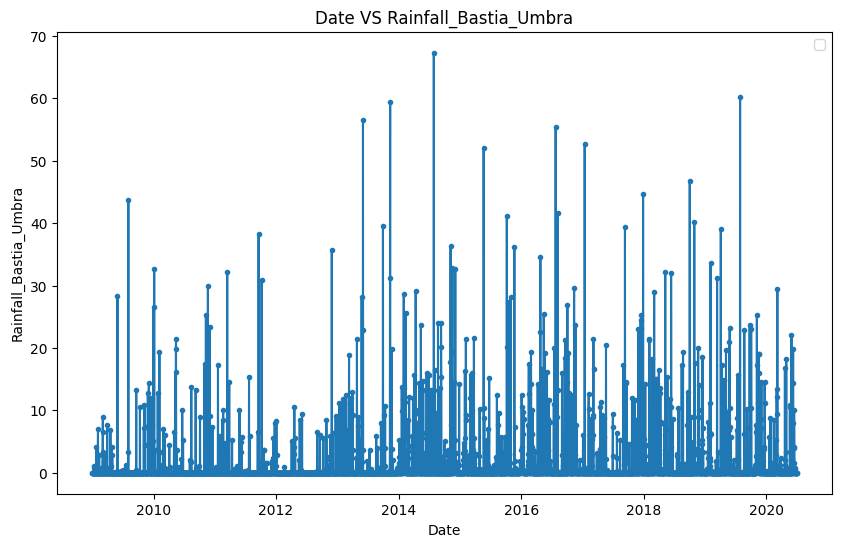

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df["Date"],df["Rainfall_Bastia_Umbra"],marker=".")
plt.title("Date VS Rainfall_Bastia_Umbra")
plt.xlabel("Date")
plt.ylabel("Rainfall_Bastia_Umbra")
plt.legend()

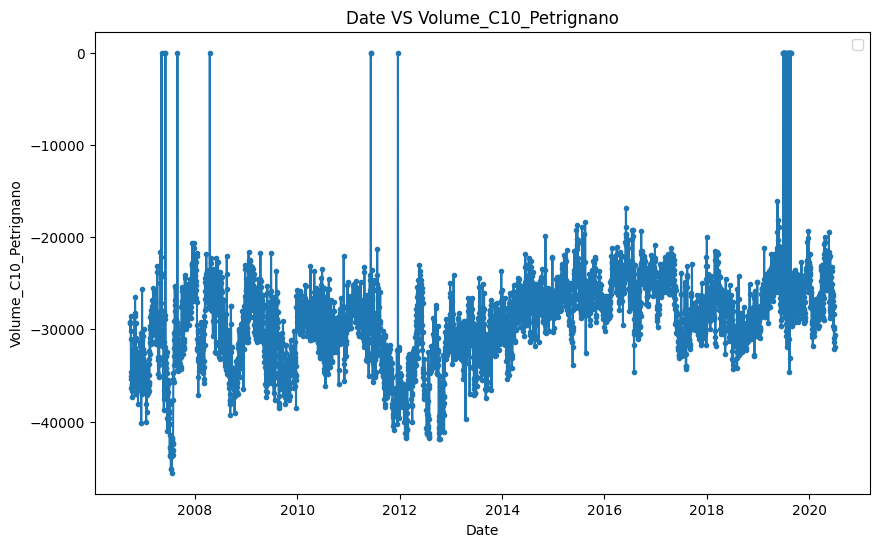

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df["Date"],df["Volume_C10_Petrignano"],marker=".")
plt.title("Date VS Volume_C10_Petrignano")
plt.xlabel("Date")
plt.ylabel("Volume_C10_Petrignano")
plt.legend()

import seaborn as sns
boxplot_col=df.select_dtypes(exclude=["object"]).columns

for i in boxplot_col:
  plt.figure(figsize=(8,6))
  sns.boxplot(df[i])
  plt.show()




In [ ]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess


In [ ]:
df.columns

Index(['Date', 'Rainfall_Bastia_Umbra', 'Depth_to_Groundwater_P24',
       'Depth_to_Groundwater_P25', 'Temperature_Bastia_Umbra',
       'Temperature_Petrignano', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano'],
      dtype='object')

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [ ]:
#file the Rainfall_Bastia_Umbra first beacuse it has the mode of 0 so we will fill it with the mean
df["Rainfall_Bastia_Umbra"].fillna(df["Rainfall_Bastia_Umbra"].mean(),inplace=True)

In [ ]:
# handle missing values
col_to_fill=df.select_dtypes(exclude=["object"]).columns
df.isna().sum()

,0
Date,0
Rainfall_Bastia_Umbra,0
Depth_to_Groundwater_P24,55
Depth_to_Groundwater_P25,39
Temperature_Bastia_Umbra,1024
Temperature_Petrignano,1024
Volume_C10_Petrignano,198
Hydrometry_Fiume_Chiascio_Petrignano,1024


In [ ]:
for col in col_to_fill:
  df[col].fillna(df[col].mode()[0],inplace=True)



In [ ]:
#Dela with outliers
columns_to_remove_outliers=["Rainfall_Bastia_Umbra","Volume_C10_Petrignano","Hydrometry_Fiume_Chiascio_Petrignano"]
Q1 = df[columns_to_remove_outliers].quantile(0.25)
Q3 = df[columns_to_remove_outliers].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df[columns_to_remove_outliers] < (Q1 - 1.5 * IQR)) | (df[columns_to_remove_outliers] > (Q3 + 1.5 * IQR))).any(axis=1)
outliers_df_iqr = df[outliers_iqr]
print("Number of outliers detected with IQR method:", len(outliers_df_iqr))
df = df[~outliers_iqr].reset_index(drop=True)
df.shape


Number of outliers detected with IQR method: 878


(4345, 8)

### **decomposition must be done after data preprosesscing**


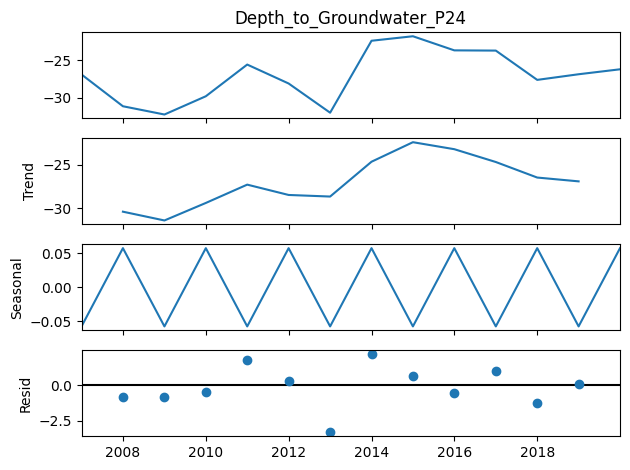

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# her we are looking for the seasonalty
# Make a copy of the original DataFrame
df_copy = df.copy()

# Set the index to "Date_index"
df_copy.set_index("Date", inplace=True)

df_seasonal = df_copy.asfreq('A')  # set frequency as needed

# Perform seasonal decomposition with a period of 4
res = sm.tsa.seasonal_decompose(df_seasonal["Depth_to_Groundwater_P24"], model="additive", period=2)#the peroid is evrey Number of year or mounth so here we looking for ever two years what is the seasonlaty

# Plot the decomposition
res.plot()
plt.show()



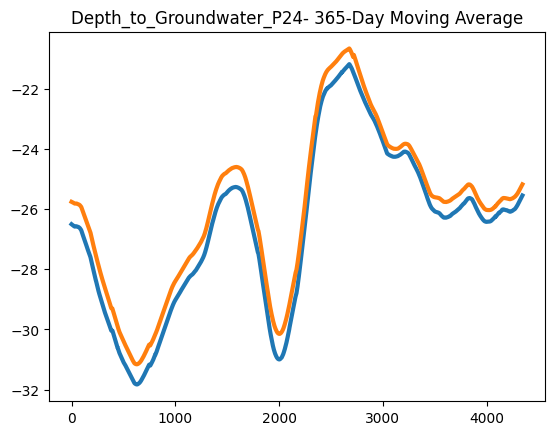

In [ ]:
# here we looking for the trend using the rolling

moving_average = df[["Depth_to_Groundwater_P24","Depth_to_Groundwater_P25"]].rolling(
    window=365,       # 365-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)
moving_average.plot(
     linewidth=3, title="Depth_to_Groundwater_P24- 365-Day Moving Average", legend=False,
);

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `Prev_Depth_to_Groundwater_P24`, which represents the previous day's groundwater depth. This helps capture the effect of past values on current observations.

- **Date Features**: Extract meaningful time-based features from the `Date` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.
  - **IsWeekend**: A binary feature that distinguishes between weekdays and weekends.
  - **Difference between Depth_to_Groundwater_P24**: Calculate the difference between consecutive values in the `Depth_to_Groundwater_P24` column to highlight short-term changes in groundwater depth.

In [ ]:
# create the lag column
df['Lag_1'] = df['Depth_to_Groundwater_P24'].shift(1)
# df = df[['Depth_to_Groundwater_P24', 'Lag_1']]


In [ ]:
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano,Lag_1
0,2006-09-27,1.556633,-24.73,-24.12,11.4,0.0,-29281.824,2.0,NaN
1,2006-09-28,1.556633,-24.77,-24.18,11.4,0.0,-29245.536,2.0,-24.73
2,2006-09-29,1.556633,-24.80,-24.22,11.4,0.0,-29355.264,2.0,-24.77
3,2006-09-30,1.556633,-24.85,-24.28,11.4,0.0,-30174.336,2.0,-24.80
4,2006-10-01,1.556633,-24.82,-24.27,11.4,0.0,-28530.144,2.0,-24.85


In [ ]:
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano,Lag_1
0,2006-09-27,1.556633,-24.73,-24.12,11.4,0.0,-29281.824,2.0,NaN
1,2006-09-28,1.556633,-24.77,-24.18,11.4,0.0,-29245.536,2.0,-24.73
2,2006-09-29,1.556633,-24.80,-24.22,11.4,0.0,-29355.264,2.0,-24.77
3,2006-09-30,1.556633,-24.85,-24.28,11.4,0.0,-30174.336,2.0,-24.80
4,2006-10-01,1.556633,-24.82,-24.27,11.4,0.0,-28530.144,2.0,-24.85


In [ ]:
# Ensure the Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create Day of the Week (0=Monday, 6=Sunday)
df['Day_of_Week'] = df['Date'].dt.dayofweek


# Generate dummy variables for Day_of_Week
df = pd.get_dummies(df, columns=['Day_of_Week'], prefix='Day',dtype=int)

# Create Month (1=January, 12=December)
df['Month'] = df['Date'].dt.month

# Create Day of the Year (1=January 1, 365=December 31)
df['Day_of_Year'] = df['Date'].dt.dayofyear

# Create IsWeekend (1 if Saturday or Sunday, otherwise 0)
df['IsWeekend'] = df['Day_of_Week'].apply(lambda x: 1 if x >= 5 else 0)

# Calculate the difference between consecutive values in Depth_to_Groundwater_P24
df['Depth_to_Groundwater_P24_Diff'] = df['Depth_to_Groundwater_P24'].diff()


# Display the DataFrame to check the results
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano,Lag_1,Month,Day_of_Year,IsWeekend,Day_0,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Depth_to_Groundwater_P24_Diff
0,2006-09-27,1.556633,-24.73,-24.12,11.4,0.0,-29281.824,2.0,NaN,9,270,0,0,0,1,0,0,0,0,NaN
1,2006-09-28,1.556633,-24.77,-24.18,11.4,0.0,-29245.536,2.0,-24.73,9,271,0,0,0,0,1,0,0,0,-0.04
2,2006-09-29,1.556633,-24.80,-24.22,11.4,0.0,-29355.264,2.0,-24.77,9,272,0,0,0,0,0,1,0,0,-0.03
3,2006-09-30,1.556633,-24.85,-24.28,11.4,0.0,-30174.336,2.0,-24.80,9,273,1,0,0,0,0,0,1,0,-0.05
4,2006-10-01,1.556633,-24.82,-24.27,11.4,0.0,-28530.144,2.0,-24.85,10,274,1,0,0,0,0,0,0,1,0.03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4345 entries, 2006-09-27 to 2020-06-30
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Rainfall_Bastia_Umbra                 4345 non-null   float64
 1   Depth_to_Groundwater_P24              4345 non-null   float64
 2   Depth_to_Groundwater_P25              4345 non-null   float64
 3   Temperature_Bastia_Umbra              4345 non-null   float64
 4   Temperature_Petrignano                4345 non-null   float64
 5   Volume_C10_Petrignano                 4345 non-null   float64
 6   Hydrometry_Fiume_Chiascio_Petrignano  4345 non-null   float64
 7   Lag_1                                 4344 non-null   float64
 8   Month                                 4345 non-null   int32  
 9   Day_of_Year                           4345 non-null   int32  
 10  IsWeekend                             4345 non-null   int64  
 11 

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [ ]:
from sklearn.model_selection import train_test_split
df.set_index("Date",inplace=True)
X=df.drop(columns="Depth_to_Groundwater_P24")
y=df["Depth_to_Groundwater_P24"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)

ValueError: too many values to unpack (expected 2)

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [4]:
train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

NameError: name 'X_train' is not defined

In [1]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(X_train, order=(5, 1, 0))  # Adjust order as needed
model_arima_fit = model_arima.fit()

NameError: name 'X_train' is not defined

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


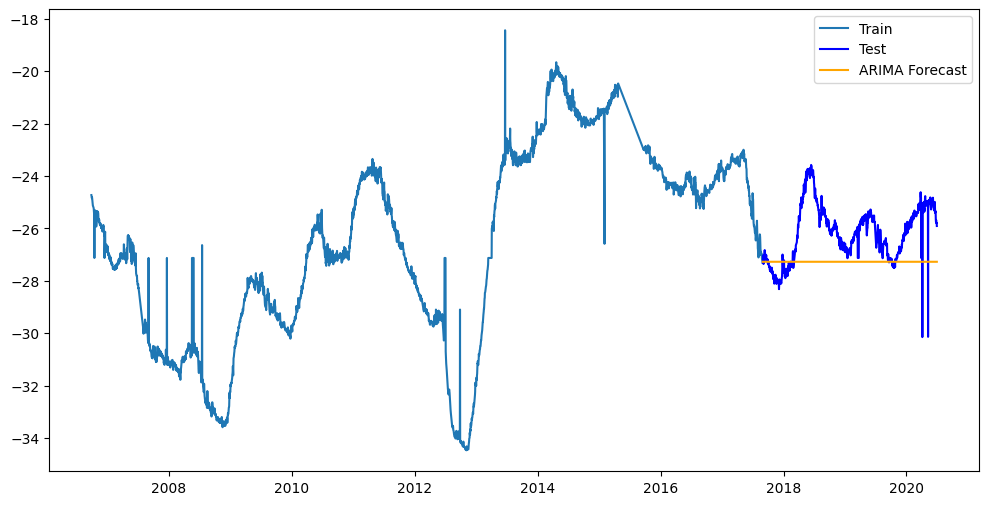

In [ ]:

# Forecast using the length of the test data
forecast_steps = len(y_test)
forecast = model_arima_fit.forecast(steps=forecast_steps)
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Train')
plt.plot(y_test.index, y_test, label='Test', color='blue')
plt.plot(y_test.index, forecast, label='ARIMA Forecast', color='orange')
plt.legend()
plt.show()

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, forecast)
print("Mean Absolute Error (MAE):", mae)
mse = mean_squared_error(y_test, forecast)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Error (MAE): 1.2619917150423334
Mean Squared Error (MSE): 2.387988303046094


### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [ ]:
# reshape input to be [samples, time steps, features]
look_back = 1
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


ValueError: cannot reshape array of size 66044 into shape (3476,1,1)

In [ ]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3476/3476 - 10s - 3ms/step - loss: nan
Epoch 2/10
3476/3476 - 10s - 3ms/step - loss: nan
Epoch 3/10
3476/3476 - 10s - 3ms/step - loss: nan
Epoch 4/10
3476/3476 - 10s - 3ms/step - loss: nan
Epoch 5/10
3476/3476 - 9s - 3ms/step - loss: nan
Epoch 6/10
3476/3476 - 10s - 3ms/step - loss: nan
Epoch 7/10
3476/3476 - 10s - 3ms/step - loss: nan
Epoch 8/10
3476/3476 - 10s - 3ms/step - loss: nan
Epoch 9/10
3476/3476 - 11s - 3ms/step - loss: nan
Epoch 10/10
3476/3476 - 11s - 3ms/step - loss: nan


In [ ]:
 model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 4)                   │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305 (1.20 KB)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 204 (820.00 B)

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [ ]:
# make predictions

trainPredict= model.predict(X_train)
testPredict = model.predict(X_test)




109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [ ]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

## Conclusion and Interpretation

Write your conclusions based on the model's performance and the forecast.

**Instructions:**
- Interpret the results and discuss the effectiveness of your model.
- Suggest potential improvements.